# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Here we implement a standardized framework for optimizing the income from work and from the Finnish Unemployment Insurance scheme. Unemployment scheme is implemented as an environment in gym_unemployment.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

pop_size=50_000

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [ ]:
cc1=Lifecycle(EK=False,minimal=False)
cc1.run_RL(train=True,steps=5_000_000,cont=False,rlmodel='dqn',save='perusmalli3_dqn',\
               pop=pop_size)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







training...







# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [3]:
cc2=Lifecycle(EK=True,minimal=False)
cc2.run_RL(train=True,steps=5_000_000,cont=False,rlmodel='dqn',save='ekn_malli3_dqn',\
               pop=pop_size)

training...
--------------------------------------
| % time spent exploring  | 96       |
| episodes                | 100      |
| mean 100 episode reward | 229      |
| steps                   | 19898    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 92       |
| episodes                | 200      |
| mean 100 episode reward | 229      |
| steps                   | 39998    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 88       |
| episodes                | 300      |
| mean 100 episode reward | 231      |
| steps                   | 60098    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 84       |
| episodes                | 400      |
| mean 100 episode reward | 232      |
| steps                   | 80198    |
--------------------------------------
--------------------------------------
| % time spen

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3600     |
| mean 100 episode reward | 237      |
| steps                   | 723398   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3700     |
| mean 100 episode reward | 238      |
| steps                   | 743498   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3800     |
| mean 100 episode reward | 234      |
| steps                   | 763598   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3900     |
| mean 100 episode reward | 237      |
| steps                   | 783698   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7200     |
| mean 100 episode reward | 231      |
| steps                   | 1446998  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7300     |
| mean 100 episode reward | 231      |
| steps                   | 1467098  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7400     |
| mean 100 episode reward | 234      |
| steps                   | 1487198  |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 7500     |
| mean 100 episode reward | 234      |
| steps                   | 1507298  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 10800    |
| mean 100 episode reward | 233      |
| steps                   | 2170598  |
--------------------------------------


KeyboardInterrupt: 

In [ ]:
cc2.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(EK=False,minimal=False,ansiopvraha_kesto300=400)
cc1_400.run_RL(train=True,steps=5_000_000,cont=False,rlmodel='dqn',save='300_vs_400_dqn',\
               pop=pop_size,start_from='perusmalli3_dqn')

In [ ]:
cc1_400.compare_with(cc1)

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(EK=False,minimal=False,ansiopvraha_toe=1.0)
cc1_toe.run_RL(train=True,steps=5_000_000,cont=False,rlmodel='dqn',save='toe_12_dqn',\
               pop=pop_size,start_from='perusmalli3_dqn')

In [ ]:
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

training...
--------------------------------------
| % time spent exploring  | 80       |
| episodes                | 100      |
| mean 100 episode reward | 228      |
| steps                   | 19898    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 60       |
| episodes                | 200      |
| mean 100 episode reward | 229      |
| steps                   | 39998    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 41       |
| episodes                | 300      |
| mean 100 episode reward | 231      |
| steps                   | 60098    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 21       |
| episodes                | 400      |
| mean 100 episode reward | 232      |
| steps                   | 80198    |
--------------------------------------
--------------------------------------
| % time spen

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3600     |
| mean 100 episode reward | 235      |
| steps                   | 723398   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3700     |
| mean 100 episode reward | 235      |
| steps                   | 743498   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3800     |
| mean 100 episode reward | 235      |
| steps                   | 763598   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3900     |
| mean 100 episode reward | 235      |
| steps                   | 783698   |
--------------------------------------
--------------------------------------
| % time spent exploring 

done


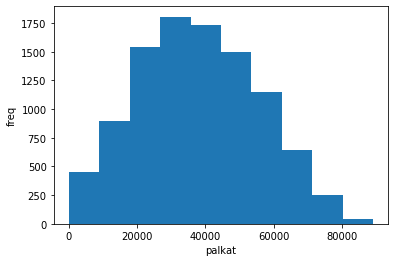

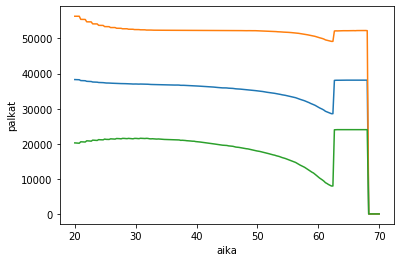

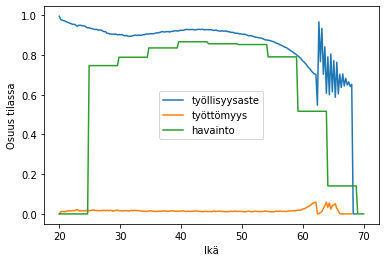

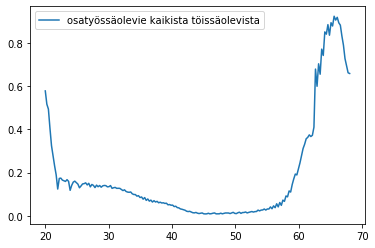

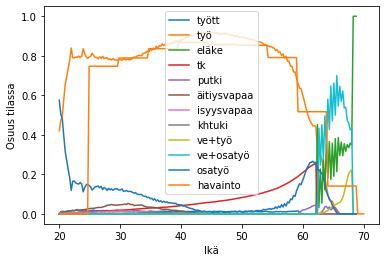

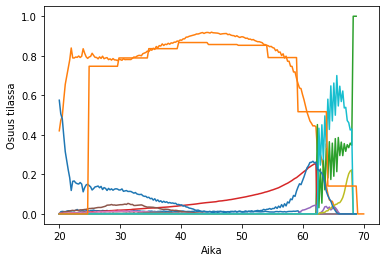

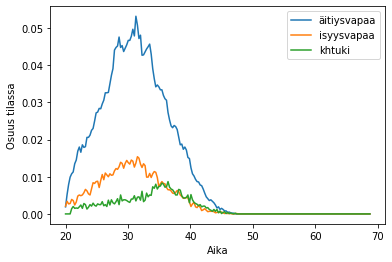

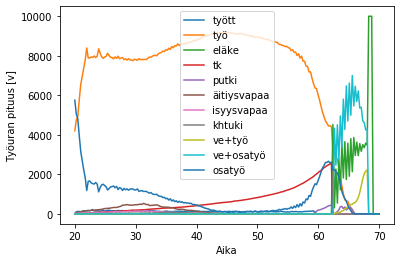

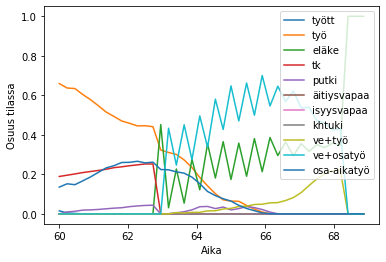

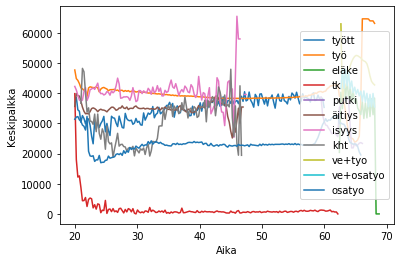

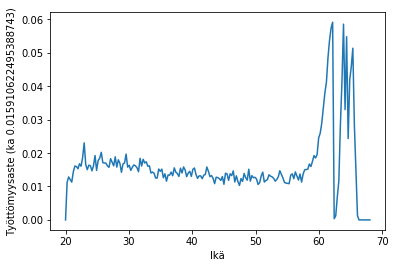

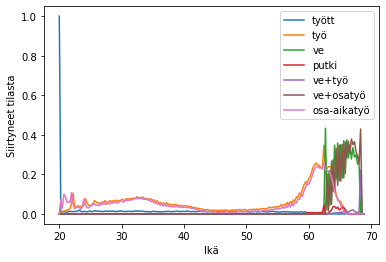

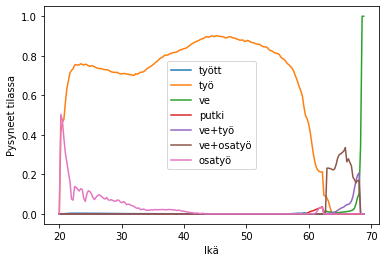

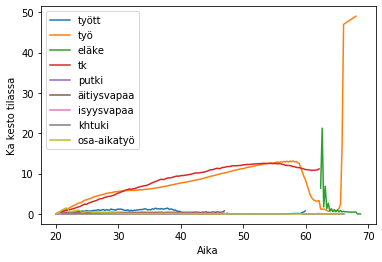

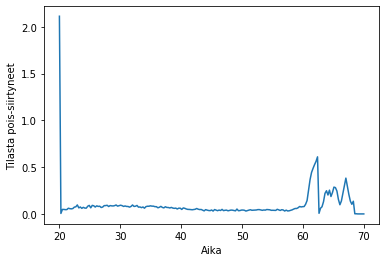

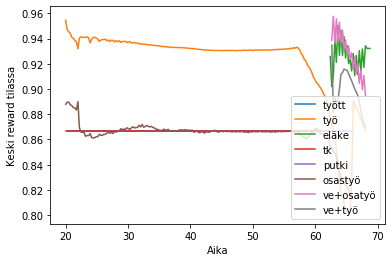

No handles with labels found to put in legend.


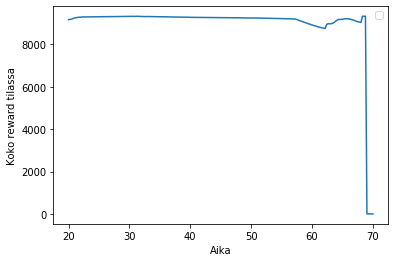

Yhteensä reward 184.30124503818507


In [10]:
cc1_350=Lifecycle(EK=False,minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350)
cc1_350.run_RL(train=True,steps=1_000_000,cont=False,rlmodel='dqn',save='50_short_dqn',\
               pop=pop_size,start_from='perusmalli3_dqn')

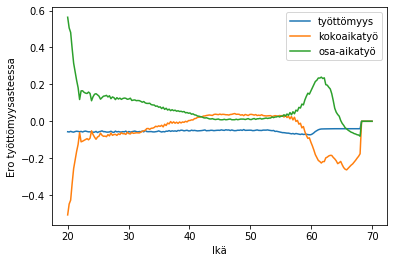

Työllisyysvaikutus noin -1484.0 htv ja 35082.0 työllistä
Epävarmuus työllisyysasteissa 0.01, hajonta 0.007788188740447291


In [11]:
cc1_350.compare_with(cc1)